In [133]:
import pandas as pd
df = pd.read_csv('/kaggle/input/quora-question-pairs/train.csv.zip')
import warnings 
warnings.filterwarnings('ignore')

In [134]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [135]:
df.shape

(404290, 6)

In [136]:
df.info() # some values are missing from the 'question2' column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404289 non-null  object
 4   question2     404288 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [137]:
df.question2.isnull().sum() # since very few values are missing from this column hence it's better to remove both the rows.

2

**let's see if the classes are balanced or not**

In [138]:
df['is_duplicate'].value_counts()

0    255027
1    149263
Name: is_duplicate, dtype: int64

**https://stackoverflow.com/questions/26476668/frequency-plot-in-python-pandas-dataframe**

<AxesSubplot:>

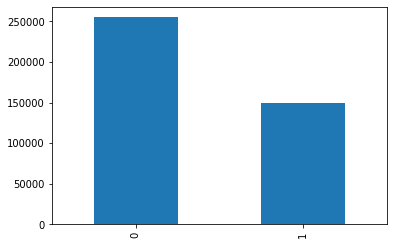

In [139]:
import matplotlib.pyplot as plt
import pandas

fig, ax = plt.subplots() # plt.subplots() is a function that returns a tuple containing a figure and axes object(s).

df['is_duplicate'].value_counts().plot(ax=ax, kind='bar')

**https://stackoverflow.com/questions/34162443/why-do-many-examples-use-fig-ax-plt-subplots-in-matplotlib-pyplot-python**

In [140]:
df.groupby("is_duplicate").count() 
# It will select all the columns present inside df and then it will group accoridng to 'is_duplicate'

,id,qid1,qid2,question1,question2
is_duplicate,,,,,
0,255027,255027,255027,255026,255025
1,149263,149263,149263,149263,149263


In [141]:
df[['id','is_duplicate']].groupby(['is_duplicate']).count()
# This will first select two columns from df and then will group them according to 'is_duplicate' .

,id
is_duplicate,
0,255027
1,149263


<AxesSubplot:xlabel='is_duplicate'>

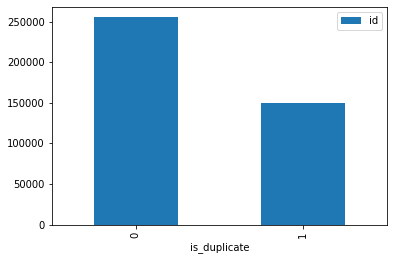

In [142]:
df[['id','is_duplicate']].groupby(['is_duplicate']).count().plot.bar() 
# This will first select three columns from df and then will group them according to 'is_duplicate' and then it will plot

<AxesSubplot:xlabel='is_duplicate'>

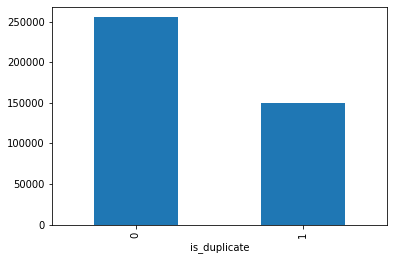

In [143]:
df.groupby("is_duplicate")['id'].count().plot.bar()
# selecting all columns from df then grouping them according to 'is_duplicate' and then accordingly counting the 'id' column
# as 'id' would be unique of every pair

<AxesSubplot:xlabel='is_duplicate'>

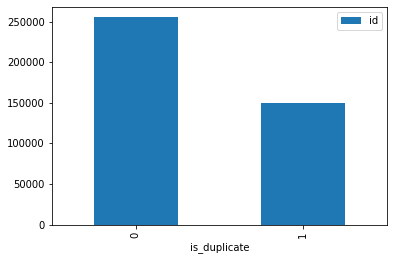

In [144]:
df[['id','is_duplicate']].groupby('is_duplicate').count().plot.bar()
# selecting the column that are required to plot
# remeber we need numeric data to plot
# df[[is_duplicate']].groupby('is_duplicate').count().plot.bar() , will result in an error

<AxesSubplot:xlabel='is_duplicate', ylabel='count'>

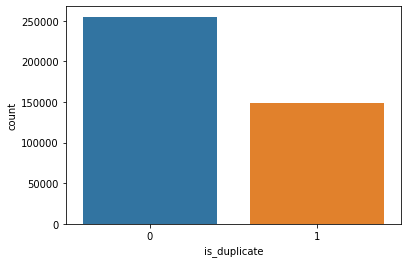

In [145]:
import seaborn as sns
sns.countplot(x = 'is_duplicate',data = df) # This is simplest and elgant

<AxesSubplot:xlabel='is_duplicate', ylabel='count'>

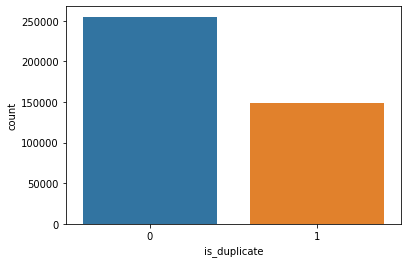

In [146]:
sns.countplot(x = df.is_duplicate) # another way since we want to plot only one column so why providing whole data

In [147]:
print('\n~> Question pairs are Similar (is_duplicate = 1):\n   {}%'.format(round(df['is_duplicate'].mean()*100, 2)) )
# we can use for loop too
print('\n~> Question pairs are Similar (is_duplicate = 1):\n   {}%'.format(100 - round(df['is_duplicate'].mean()*100, 2)))
# just subtract from 100 to get the percentage of other class


~> Question pairs are Similar (is_duplicate = 1):
   36.92%

~> Question pairs are Similar (is_duplicate = 1):
   63.08%


**Number of Unique Questions**

In [148]:
import numpy as np
qids = pd.Series( df['qid1'].tolist() + df['qid2'].tolist() )
unique_questions = len(qids.unique())
print("Total Number of Unique Questions {}".format(unique_questions))

repeated_questions = np.sum(qids.value_counts()>1) # value_counts gives the count of every category
print("Total Number of Unique Questions are {}({})\n".format(repeated_questions,repeated_questions/unique_questions*100))

q_vals = qids.value_counts() # contains frequncy of every question
print("Maximum Number of times one question is repeated is {}\n".format(max(q_vals)) )


# print(type(q_vals),q_vals.shape) # two columns one containing category other containing it's occurence
# print(q_vals)
# q_vals = q_vals.values # Return Series as ndarray or ndarray-like depending on the dtype
# print(q_vals)

Total Number of Unique Questions 537933
Total Number of Unique Questions are 111780(20.77953945937505)

Maximum Number of times one question is repeated is 157



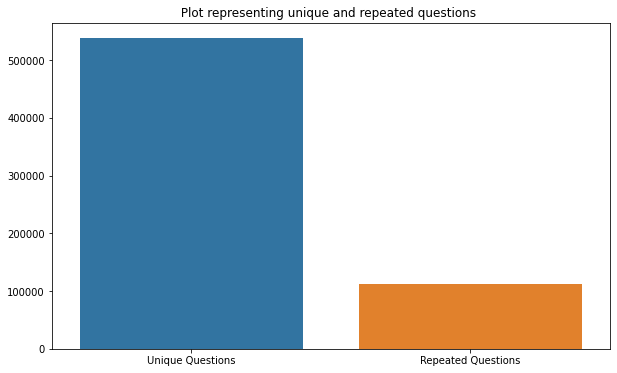

In [149]:
x_axis = ['Unique Questions','Repeated Questions']
y_axis = [unique_questions,repeated_questions]

plt.figure(figsize=(10,6))
plt.title (" Plot representing unique and repeated questions  ")
sns.barplot(x = x_axis,y= y_axis)
plt.show()

## Checking for Duplicates

In [150]:
pair_duplicates = df[['qid1','qid2','is_duplicate']].groupby(['qid1','qid2']).count().reset_index()
print(pair_duplicates.head())
print("Number of Duplicate Questions are :- ",df.shape[0] - pair_duplicates.shape[0]) # Finding the Difference in number of rows

   qid1    qid2  is_duplicate
0     1       2             1
1     3       4             1
2     3  282170             1
3     3  380197             1
4     3  488853             1
Number of Duplicate Questions are :-  0


## Number of occurrences of each Question

Maximum number of times a single question is repeated: 157



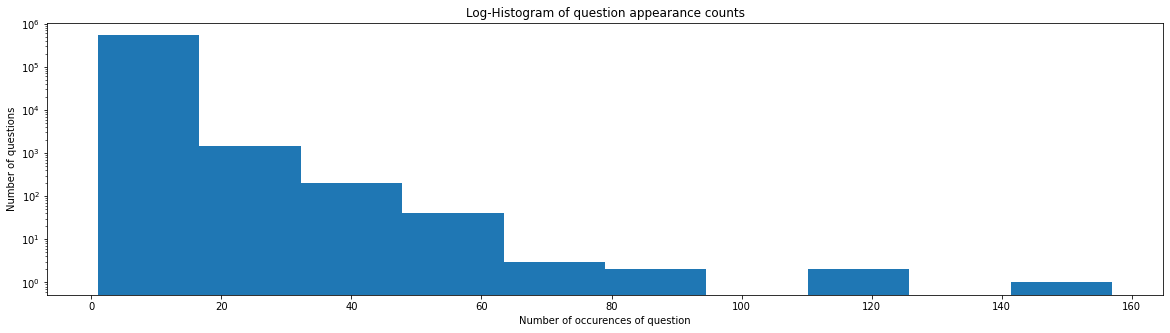

In [151]:
plt.figure(figsize = (20,5))
plt.hist(qids.value_counts()) # If bins is an integer, it defines the number of equal-width bins in the range.by def 10 bins

plt.yscale("log")# setting the y-axis scale to log

plt.title('Log-Histogram of question appearance counts')

plt.xlabel('Number of occurences of question')

plt.ylabel('Number of questions')

print ('Maximum number of times a single question is repeated: {}\n'.format(max(qids.value_counts()))) 

Maximum number of times a single Question is repeated: 157



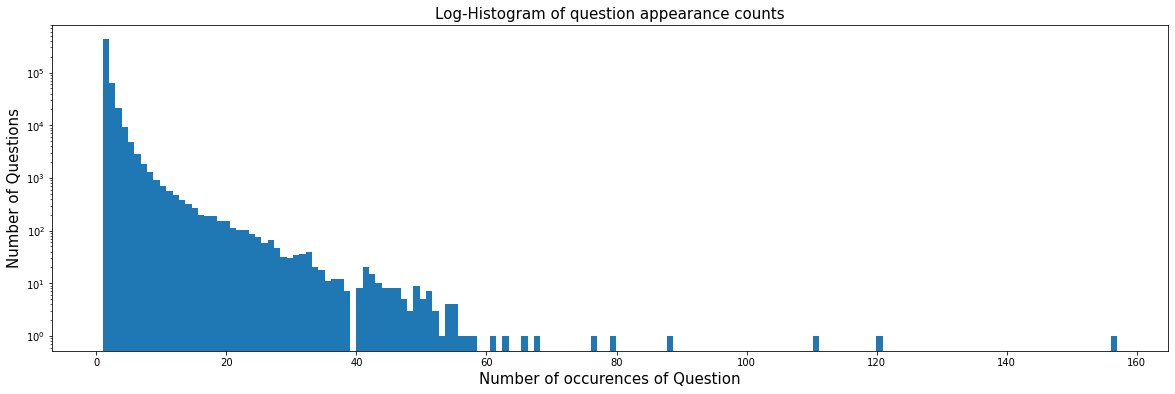

In [152]:
plt.figure(figsize = (20,6))
plt.hist(qids.value_counts(),bins = 160) 
plt.yscale("log",nonpositive = 'clip')# Any nonpositive value will be clipped to a number very close to 0 or 1

plt.title('Log-Histogram of question appearance counts',fontsize = 15)

plt.xlabel('Number of occurences of Question',fontsize = 15)

plt.ylabel('Number of Questions',fontsize = 15)

print ('Maximum number of times a single Question is repeated: {}\n'.format(max(qids.value_counts()))) 

## Checking for Null Values

In [153]:
nan_rows = df[df.isnull().any(axis = 1)] # it will filter row by row instead column by column
print (nan_rows)

            id    qid1    qid2                         question1  \
105780  105780  174363  174364    How can I develop android app?   
201841  201841  303951  174364  How can I create an Android app?   
363362  363362  493340  493341                               NaN   

                                                question2  is_duplicate  
105780                                                NaN             0  
201841                                                NaN             0  
363362  My Chinese name is Haichao Yu. What English na...             0  


In [154]:
# Filling the null values with ' '
df = df.fillna('')
nan_rows = df[df.isnull().any(1)] 
#  when the text column is missing, we have to drop those rows.but here we are just filling because only two rows are missing.
print (nan_rows)

Empty DataFrame
Columns: [id, qid1, qid2, question1, question2, is_duplicate]
Index: []


<h2> Basic Feature Extraction (before cleaning) </h2>

Let us now construct a few features like:
 - **freq_qid1** = Frequency of qid1's
 - ____freq_qid2____ = Frequency of qid2's 
 - ____q1len____ = Length of q1 (string length)
 - ____q2len____ = Length of q2
 - ____q1_n_words____ = Number of words in Question 1
 - ____q2_n_words____ = Number of words in Question 2
 - ____word_Common____ = (Number of common unique words in Question 1 and Question 2)
 - ____word_Total____ =(Total num of words in Question 1 + Total num of words in Question 2)
 - ____word_share____ = (word_common)/(word_Total)
 - ____freq_q1+freq_q2____ = sum total of frequency of qid1 and qid2 
 - ____freq_q1-freq_q2____ = absolute difference of frequency of qid1 and qid2 

In [155]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


**https://pbpython.com/pandas_transform.html**

In [156]:
df['freq_qid1'] = df.groupby('qid1')['qid1'].transform('count') # where count is the function that would be applied to each group.
df['freq_qid2'] = df.groupby('qid2')['qid2'].transform('count') 

print(df[['freq_qid1','freq_qid2']]) #  here 0th column  is Index of original data Frame

        freq_qid1  freq_qid2
0               1          1
1               4          1
2               1          1
3               1          1
4               3          1
...           ...        ...
404285          2          2
404286         12          1
404287          1          1
404288          1          1
404289          1          1

[404290 rows x 2 columns]


In [157]:
df['q1len'] = df['question1'].str.len() # length of the questions
df['q2len'] = df['question2'].str.len()

In [158]:
df['q1_n_words'] = df['question1'].apply(lambda row : len(row.split(" ")) ) # finding the number of words in a question
df['q2_n_words'] = df['question2'].apply(lambda row : len(row.split(" ")) )

In [159]:
df[['question1','q1len','freq_qid1','question2','q2len','freq_qid2']].head()

,question1,q1len,freq_qid1,question2,q2len,freq_qid2
0,What is the step by step guide to invest in sh...,66,1,What is the step by step guide to invest in sh...,57,1
1,What is the story of Kohinoor (Koh-i-Noor) Dia...,51,4,What would happen if the Indian government sto...,88,1
2,How can I increase the speed of my internet co...,73,1,How can Internet speed be increased by hacking...,59,1
3,Why am I mentally very lonely? How can I solve...,50,1,Find the remainder when [math]23^{24}[/math] i...,65,1
4,"Which one dissolve in water quikly sugar, salt...",76,3,Which fish would survive in salt water?,39,1


In [160]:
def normalized_word_Common(row):
    
    set1 = set( map ( lambda word : word.lower().strip() , row['question1'].split(" ") ))
    set2 = set( map ( lambda word : word.lower().strip() , row['question2'].split(" ") ))
    
#     print(len(set1 and set2 ))
#     print(len(set1  &  set2 ))        
#     print(len(set1.intersection(set2)))
    
    return 1.0 * len(set1.intersection(set2))

df['word_Common'] = df.apply(normalized_word_Common,axis = 1) # applying function along column

In [161]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,freq_qid1,freq_qid2,q1len,q2len,q1_n_words,q2_n_words,word_Common
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,1,1,66,57,14,12,10.0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,4,1,51,88,8,13,4.0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,1,1,73,59,14,10,4.0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,1,1,50,65,11,9,0.0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,3,1,76,39,13,7,2.0


In [162]:
def normalized_word_Total(row):
    
    set1 = set( map(lambda word : word.lower().strip(), row['question1'].split(" ")))
    set2 = set( map(lambda word : word.lower().strip(), row['question2'].split(" ")))
    
    return 1.0 * ( len(set1) + len(set2) )

df['word_Total'] = df.apply(normalized_word_Total,axis = 1)

In [163]:
df.head(2)

,id,qid1,qid2,question1,question2,is_duplicate,freq_qid1,freq_qid2,q1len,q2len,q1_n_words,q2_n_words,word_Common,word_Total
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,1,1,66,57,14,12,10.0,23.0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,4,1,51,88,8,13,4.0,20.0


In [164]:
def normalized_word_share(row):
    
    set1 = set( map(lambda word : word.lower().strip(), row['question1'].split() ))
    set2 = set( map(lambda word : word.lower().strip(), row['question2'].split() ))
    
    return 1.0 *  ( len(set1 & set2) )/( len(set1) + len(set2) )  

df['word_share'] = df.apply(normalized_word_share,axis = 1)

In [165]:
df.head(2)

,id,qid1,qid2,question1,question2,is_duplicate,freq_qid1,freq_qid2,q1len,q2len,q1_n_words,q2_n_words,word_Common,word_Total,word_share
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,1,1,66,57,14,12,10.0,23.0,0.434783
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,4,1,51,88,8,13,4.0,20.0,0.200000


In [166]:
df['freq_q1+q2'] =      df['freq_qid1'] + df['freq_qid2']
df['freq_q1-q2'] = abs( df['freq_qid1'] - df['freq_qid2'] )
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,freq_qid1,freq_qid2,q1len,q2len,q1_n_words,q2_n_words,word_Common,word_Total,word_share,freq_q1+q2,freq_q1-q2
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,1,1,66,57,14,12,10.0,23.0,0.434783,2,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,4,1,51,88,8,13,4.0,20.0,0.200000,5,3
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,1,1,73,59,14,10,4.0,24.0,0.166667,2,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,1,1,50,65,11,9,0.0,19.0,0.000000,2,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,3,1,76,39,13,7,2.0,20.0,0.100000,4,2


<h3> 3.3.1 Analysis of some of the extracted features </h3>

In [167]:
print(" Minimum Length of the Questions in question1 :- ", min(df['q1_n_words']) )
print(" Minimum Length of the Questions in question2 :- ", min(df['q2_n_words']) )

 Minimum Length of the Questions in question1 :-  1
 Minimum Length of the Questions in question2 :-  1


In [168]:
# let's check how many such questions are there 

print("Number of Questions with Minimum Length [question1] :- ", df[df['q1_n_words'] == 1].shape[0] ) # can also be done with apply method.
print("Number of Questions with Minimum Length [question2] :- ", sum(df['q2_n_words'].apply(lambda x: True if x == 1 else False)) )

Number of Questions with Minimum Length [question1] :-  67
Number of Questions with Minimum Length [question2] :-  24


<h3> Feature Selection </h3>

<h4> Feature: word_share </h4>

<AxesSubplot:xlabel='is_duplicate', ylabel='word_share'>

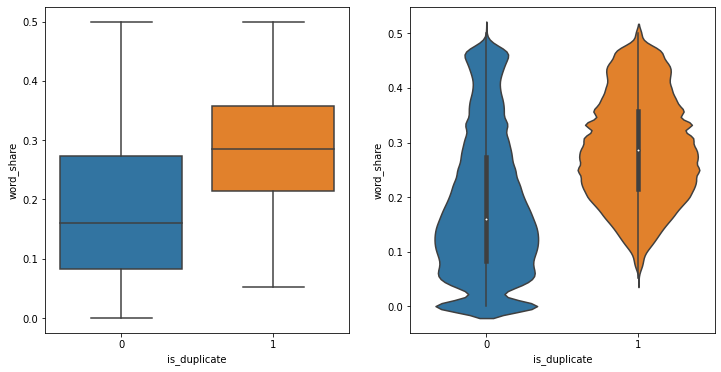

In [169]:
plt.figure( figsize = (12,6) )

plt.subplot(1,2,1) # Divide figure in 1*2 number of subplots with 1 row and 2 columns (1,2,1) means 1 row 2 column 
sns.boxplot(x = 'is_duplicate',y = 'word_share',data = df)                           # and figure to be plotted in firsr cell.


plt.subplot(1,2,2) # figure would be plotted in 2nd cell
sns.violinplot(x = 'is_duplicate',y = 'word_share',data = df)

The boxes in Box-Plot are not overlapping perfectly.

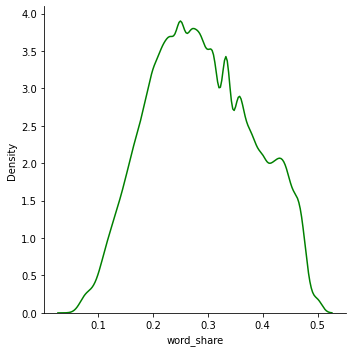

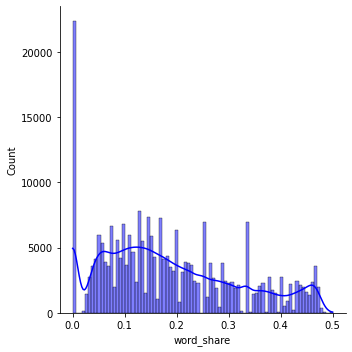

In [170]:
sns.displot(df[df['is_duplicate'] == 1.0] , x = 'word_share',color = 'green',kind  = 'kde') 
sns.displot(df[df['is_duplicate'] == 0.0] , x = 'word_share',color = 'blue', kde = True) # it's tough to distinguish both using this plot

<AxesSubplot:xlabel='word_share', ylabel='Density'>

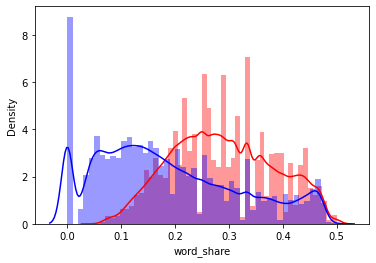

In [171]:
sns.distplot(df[df['is_duplicate'] == 1.0]['word_share'], label = '1',color = 'red' ) # get me the word_share wherever is_duplicate == 1
sns.distplot(df[df['is_duplicate'] == 0.0]['word_share'], label = '0', color = 'blue')

# we know lesser the overlap between the features better it is to distinguih them.
# in worst case overlap would be high and in best case overlap would be very very low

- The distributions for normalized word_share have some overlap on the far right-hand side, i.e., there are quite a lot of questions with high word similarity
- The average word share and Common no. of words of qid1 and qid2 is more when they are duplicate(Similar)

<h4> Feature:- word_Common </h4>

<AxesSubplot:xlabel='is_duplicate', ylabel='word_Common'>

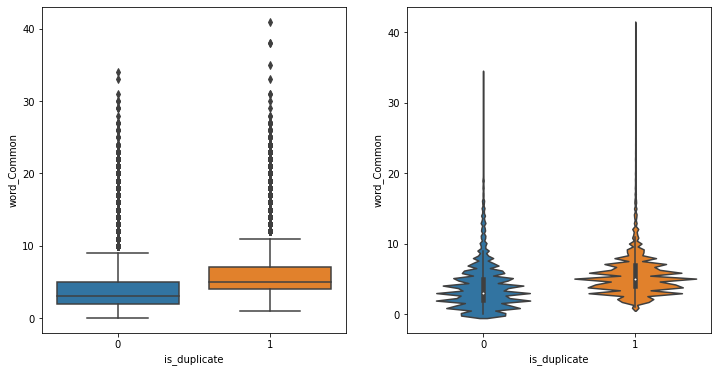

In [172]:
plt.figure(figsize = (12,6))

plt.subplot(1,2,1)
sns.boxplot(x = 'is_duplicate',y = 'word_Common',data = df)

plt.subplot(1,2,2)
sns.violinplot(x = 'is_duplicate',y = 'word_Common',data = df)

The boxes in Box-plot are more overlaping than boxes in Box-plot of feature word_Common.

compare the Violin plots of both word_share and word_Common, we see it's harder to separate classes (0/1) using feature word_common due to
high overlap.

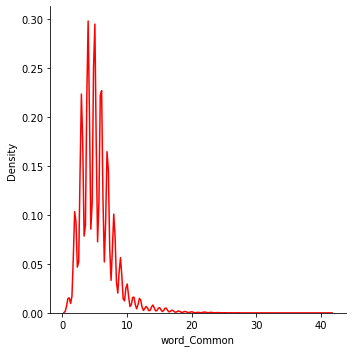

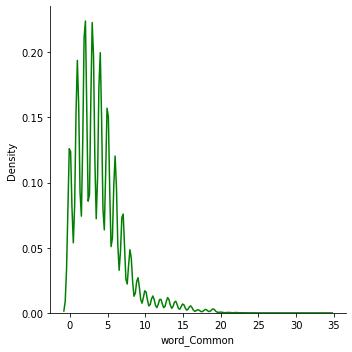

In [173]:
sns.displot(df[df['is_duplicate'] == 1.0], x = 'word_Common',kind = 'kde',color = 'red')
sns.displot(df[df['is_duplicate'] == 0.0], x = 'word_Common',kind = 'kde',color = 'green')

<AxesSubplot:xlabel='word_Common', ylabel='Density'>

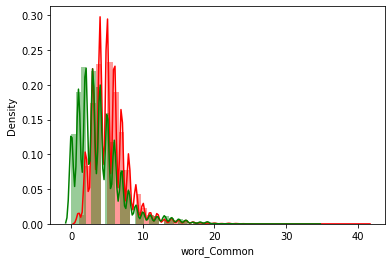

In [174]:
sns.distplot(df[ df['is_duplicate'] == 1.0 ]['word_Common'],color = 'red')
sns.distplot(df[ df['is_duplicate'] == 0.0 ]['word_Common'],color = 'green')

The distributions of the word_Common feature in similar and non-similar questions are highly overlapping.

<h4> Feature :- freq_qid1 </h4>

<AxesSubplot:xlabel='is_duplicate', ylabel='freq_qid1'>

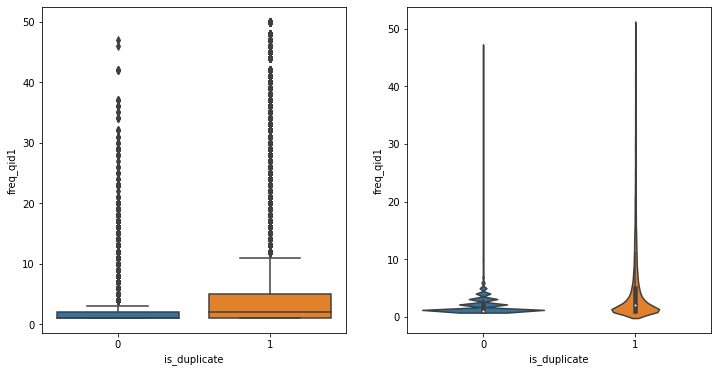

In [175]:
plt.figure(figsize = (12,6))

plt.subplot(1,2,1)
sns.boxplot(x = 'is_duplicate',y = 'freq_qid1',data = df)

plt.subplot(1,2,2)
sns.violinplot(x = 'is_duplicate',y = 'freq_qid1',data = df)

 Too much overlap :-  Discard the Feature

<h4> Feature :- freq_qid2 </h4>

<AxesSubplot:xlabel='is_duplicate', ylabel='freq_qid2'>

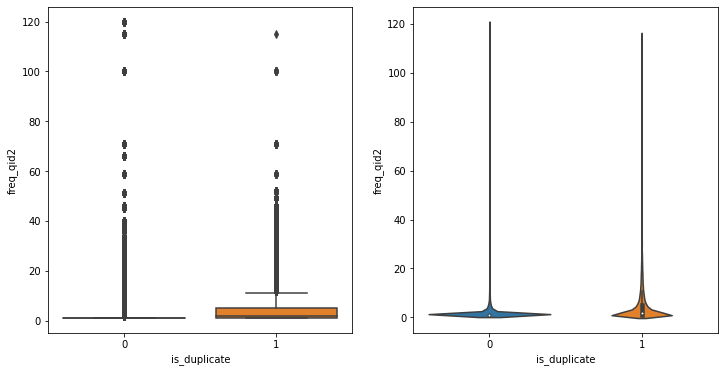

In [176]:
plt.figure(figsize = (12,6))

plt.subplot(1,2,1)
sns.boxplot(x = 'is_duplicate',y = 'freq_qid2',data = df)

plt.subplot(1,2,2)
sns.violinplot(x = 'is_duplicate',y = 'freq_qid2',data = df)

Too much overlap :-  Discard the Feature

<h4> Feature :- q1len </h4>

<AxesSubplot:xlabel='is_duplicate', ylabel='q1len'>

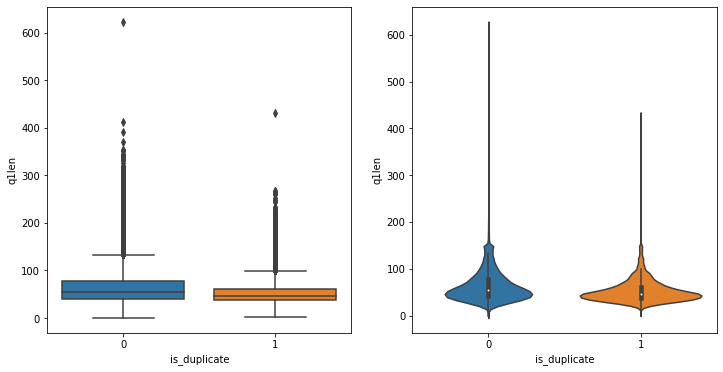

In [177]:
plt.figure(figsize = (12,6))

plt.subplot(1,2,1)
sns.boxplot(x = 'is_duplicate', y = 'q1len',data = df)

plt.subplot(1,2,2)
sns.violinplot(x = 'is_duplicate',y = 'q1len',data = df)

<h4> Feature :- q2len2 </h4>

<AxesSubplot:xlabel='is_duplicate', ylabel='q1len'>

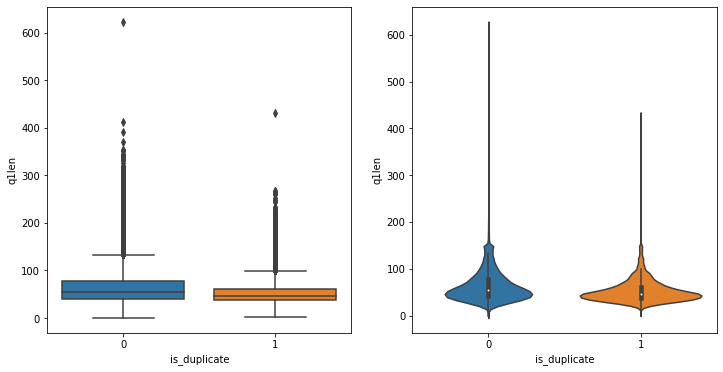

In [178]:
plt.figure(figsize = (12,6))

plt.subplot(1,2,1)
sns.boxplot(x = 'is_duplicate', y = 'q1len',data = df)

plt.subplot(1,2,2)
sns.violinplot(x = 'is_duplicate',y = 'q1len',data = df)

Too much overlap :- Discard the feature

<h4> Feature :- q1_n_words

<AxesSubplot:xlabel='is_duplicate', ylabel='q1_n_words'>

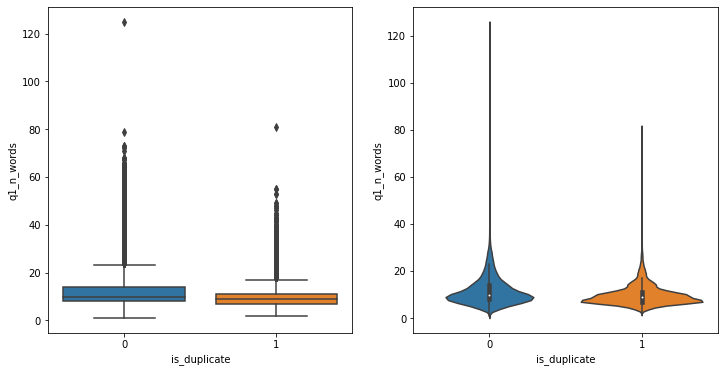

In [179]:
plt.figure(figsize = (12,6))

plt.subplot(1,2,1)
sns.boxplot(x = 'is_duplicate', y = 'q1_n_words',data = df)

plt.subplot(1,2,2)
sns.violinplot(x = 'is_duplicate',y = 'q1_n_words',data = df)

Too much overlap :- Discard the feature

<h4> Feature :- q2_n_words </h4>

<AxesSubplot:xlabel='is_duplicate', ylabel='q2_n_words'>

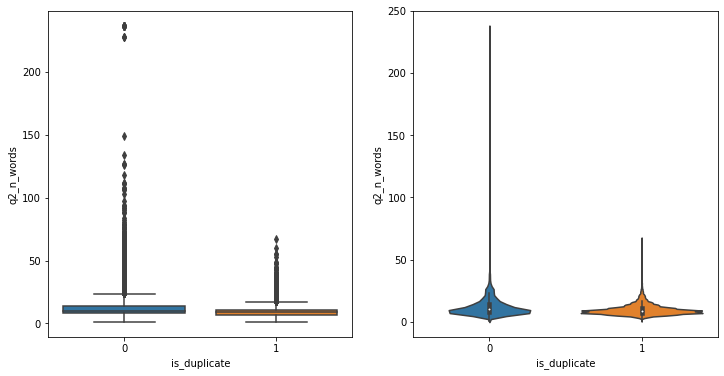

In [180]:
plt.figure(figsize = (12,6))

plt.subplot(1,2,1)
sns.boxplot(x = 'is_duplicate', y = 'q2_n_words',data = df)

plt.subplot(1,2,2)
sns.violinplot(x = 'is_duplicate',y = 'q2_n_words',data = df)

Too much overlap :- Discard the feature

<h4> Feature :- word_Total </h4>

<AxesSubplot:xlabel='is_duplicate', ylabel='word_Total'>

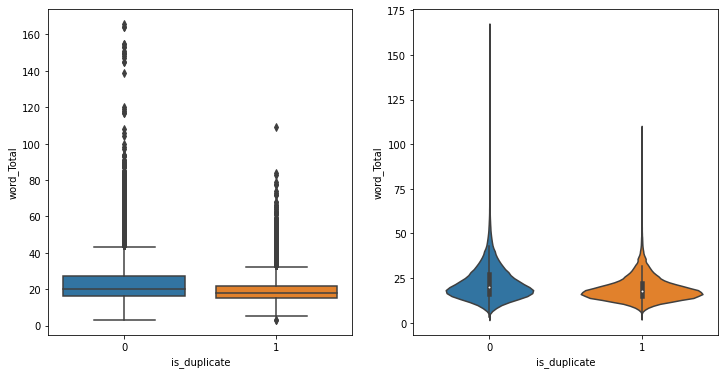

In [181]:
plt.figure(figsize = (12,6))

plt.subplot(1,2,1)
sns.boxplot(x = 'is_duplicate', y = 'word_Total',data = df)

plt.subplot(1,2,2)
sns.violinplot(x = 'is_duplicate',y = 'word_Total',data = df)

Too much overlap :- Discard the feature

<h4> Feature :- freq_q1+q2 </h4>

<AxesSubplot:xlabel='is_duplicate', ylabel='freq_q1+q2'>

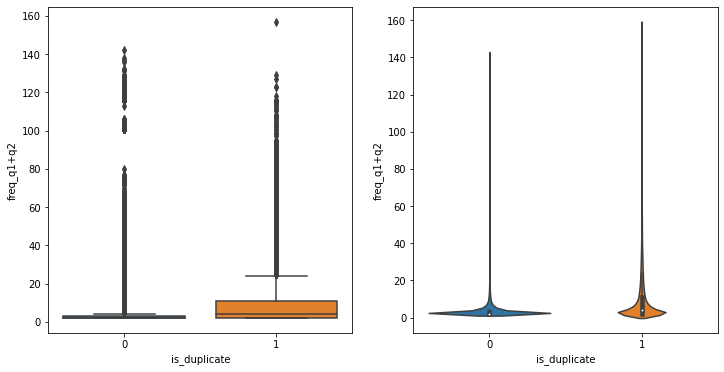

In [182]:
plt.figure(figsize = (12,6))

plt.subplot(1,2,1)
sns.boxplot(x = 'is_duplicate', y = 'freq_q1+q2',data = df)

plt.subplot(1,2,2)
sns.violinplot(x = 'is_duplicate',y = 'freq_q1+q2',data = df)

Too much overlaping :- Discard the feature

<h4> Feature :- freq_q1-q2 </h4>

<AxesSubplot:xlabel='is_duplicate', ylabel='freq_q1-q2'>

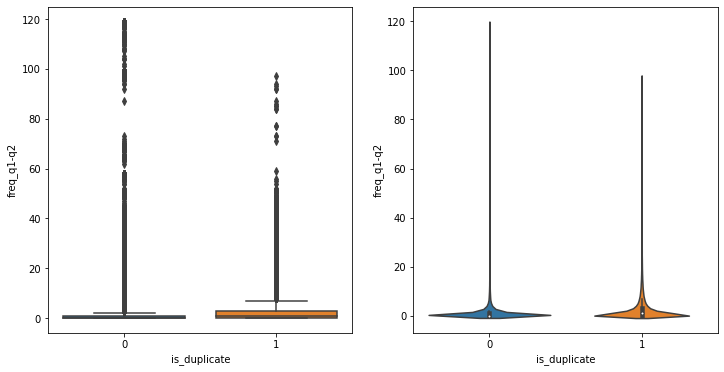

In [183]:
plt.figure(figsize = (12,6))

plt.subplot(1,2,1)
sns.boxplot(x = 'is_duplicate', y = 'freq_q1-q2',data = df)

plt.subplot(1,2,2)
sns.violinplot(x = 'is_duplicate',y = 'freq_q1-q2',data = df)

Too much overlap :- Discard the feature

<h5> word_share is the only useful feature of our designed features </h5>